# Underfitting and Overfitting

In this tutorial we'll cover a common challenge in ML and how to fix it.

We will understand what underfitting, overfitting are and the difference between the two. 

Once we cover the basics, we will dive deeper into:
1. Detecting if we have an issue with under/overfitting (and understand which one do we have).
2. Understanding how to solve it, and if our method has solved it.

We will see how the different plots at our disposal (via `sklearn-evaluation`) can shorten our time to a working model.

**TLDR: A learning curve shows the performance of a model on training and validation data as the amount of data used to train the model increases.** 


**This can give us indications as to whether the model is suffering from overfitting or underfitting.**

In [1]:
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree

from sklearn.datasets import make_classification

import numpy as np

from sklearn_evaluation import plot

## Overfitting

Overfitting occurs when a machine learning model is trained too well on the training data.
As a result, it performs poorly on new, unseen data. There are a few signs that a model may be overfitting:
1. The model's performance on training data is significantly better than its performance on the validation or test data.
2. The model's performance flattens or starts to decrease after a certain point in the training process.
3. The model's complexity is significantly greater than the complexity of the problem.

## Underfitting

Underfitting happens when our model cannot capture the underlying patterns in the training data.
This resuls in poor performance on both the training and validation/test sets. 

There are a few signs that a model may be underfitting:
1. The model's performance on the training data is significantly worse than expected or worse than a simple baseline model.
2. The model's performance on the validation/test data is not much better than random guessing.
3. The model's complexity is significantly lower than the complexity of the problem.


## Detection

In this section, we'll detect which one we're experiencing and what our learning curve tells us. An easy way to determine overfitting or underfitting is by looking at our learning curve. 

### Diagnosing Overfitting with Learning Curve

If there is a large gap between the train and validation curve, we are overfitting.

Here is an example of a learning curve with significant overfitting:

In [2]:
X, y = make_classification(
    n_samples=1000, random_state=0, class_sep=0.2
)

<Axes: title={'center': 'Learning Curve'}, xlabel='Training examples', ylabel='Score mean'>

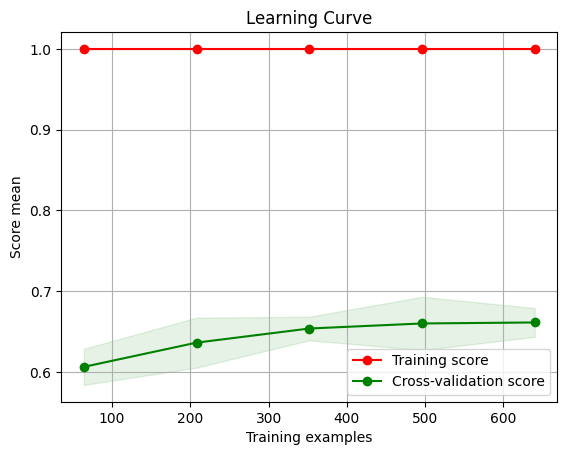

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)
estimator = tree.DecisionTreeClassifier(max_depth=None)
train_sizes = np.linspace(0.1, 1.0, 5)
train_sizes, train_scores, test_scores = learning_curve(
    estimator, X=X_train, y=y_train, train_sizes=train_sizes
)
plot.learning_curve(train_scores, test_scores, train_sizes)

Here, we can easily identify an issue. While the model's performance on the training data is almost perfect, its performance on the validation data is poor in comparison— thus, it is overfitting.

### Diagnosing Underfitting with Learning Curve

If we see that the training score is consistently and particularly low, we are underfitting.

Here is an example of a learning curve with underfitting:

In [4]:
X, y = make_classification(
    n_samples=100, n_features=20, n_informative=2,
    n_repeated=2, n_redundant=2, class_sep=0, random_state=0
)

Here, we generate data with a small sample size by passing a low argument into the `n_samples` parameter, insert useless features, and create a large amount of noise with a low `class_sep` value.

<Axes: title={'center': 'Learning Curve'}, xlabel='Training examples', ylabel='Score mean'>

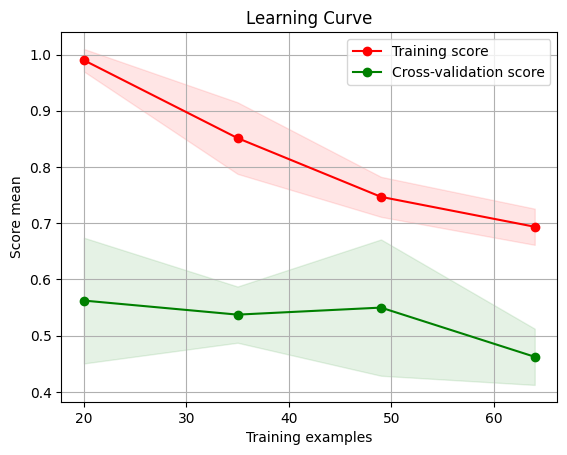

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

estimator = LogisticRegression()
train_sizes = np.linspace(0.1, 1.0, 5)
train_sizes, train_scores, test_scores = learning_curve(
    estimator, X=X_train, y=y_train, train_sizes=train_sizes
)

plot.learning_curve(train_scores, test_scores, train_sizes)

We now use a simpler model as well. As a result, the learning curve shows significant underfitting and is unable to effectively detect patterns in the data. The model is not performing correctly on both the training and validation data.

## How do we solve it?

There are a few ways in which we can improve our performance. As some solutions can help with both and some are relevant only to one set of issues, we'll seperate the methods into 2 sections.

### Solving Overfitting

1) Increase your dataset's size through augmentation. Applying transformations to or reworking existing data can greatly improve your model's performance.
2) [Regularization techniques](https://cmci.colorado.edu/classes/INFO-4604/files/slides-6_regularization.pdf) such as dropout and early stopping can be very useful.

Some other methods may include: cross-validation and ensemble methods

### Solving Underfitting

1) Add more observations. More data may enable your model to pick up on existing patterns.
2) Add more features. Your dataset may be too simple, and your model may not have enough features to create an optimal fit.
3) Select a more powerful and/or complex model.

Some other methods may include: ensemble methods, [hyperparameter tuning](https://guides.lib.purdue.edu/d-velop/ml-dl/automl1), and transfer learning